In [1]:
#In this project we are creating a titanic survival prediction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline 
plt.rcParams['figure.figsize']=(8,5)

In [2]:
# Reading the dataset to analyze and view

path = os.path.join('C:' + os.sep, 'Users', 'super', 'Desktop', 'train.csv')
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# let us check the shape of our array
print(df.shape)

(891, 12)


In [4]:
# let us take a look at the data types of all the variables present. Rememeber our main variable is survived.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Let us change the datasets for sex and embarked as these will be useful to us
df["Sex"] = df["Sex"].astype(str)
df["Embarked"] = df["Embarked"].astype(str)

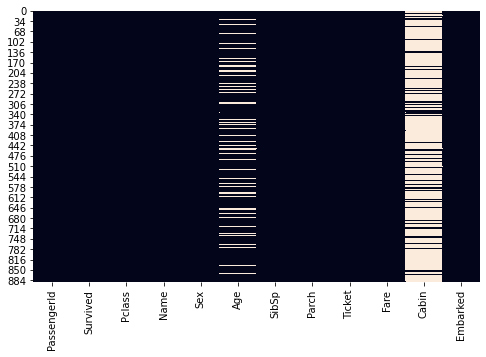

In [6]:
#let us take a look at every cell that has a null value
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [7]:
#Based on what we need to calculate let us simplify the table by removing unnecessary variables
df.drop(["Cabin","Name","PassengerId","Ticket"],axis = 1,inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


C:\Users\super\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


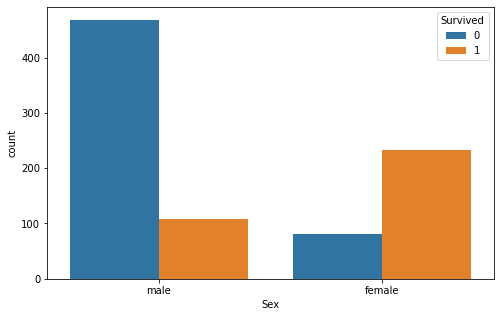

In [8]:
# Visualization Time
# Let us take a look at all those that have survived on a bar graph separated by male and female.
sns.countplot("Sex", data = df, hue ="Survived")
plt.show() 

C:\Users\super\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


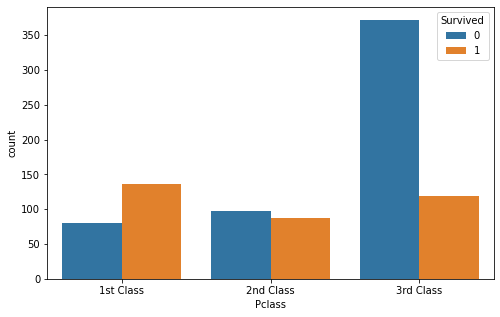

In [9]:
# In the above graph you see that '0' is for 'Not Survived' and '1' is for 'Survived'
# Now let us separate the graph through the class in which the passenger was, given that there are 3 classes.

x= [0,1,2]
sns.countplot("Pclass", data = df, hue ="Survived")
labels = ["1st Class","2nd Class","3rd Class"]
plt.xticks(x, labels)
plt.show()   

C:\Users\super\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


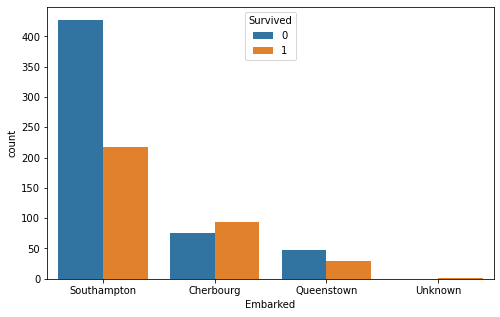

In [10]:
# Now let us create one more graph showing where they have embarked from.

x = [0,1,2,3]
sns.countplot("Embarked", data = df, hue ="Survived")
labels = ["Southampton","Cherbourg", "Queenstown", "Unknown"]
plt.xticks(x,labels)
plt.show()    

In [11]:
# Let us encode the data so it will be easier to process

le = LabelEncoder()

In [12]:
for val in df.columns:
    if df[val].dtype == "O":
        df[val] = le.fit_transform(df[val])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
# As we noted before there were some NULL values so let us fill them

def fillmissing_val(col):
    mean = col.mean()
    col.fillna(mean, inplace = True)
fillmissing_val(df["Age"])
fillmissing_val(df["Fare"])
fillmissing_val(df["Embarked"])

In [14]:
df["Age"] = np.round(df["Age"])
df["Age"] = df["Age"].astype(int)

In [15]:
# Let us check for NULL values again
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

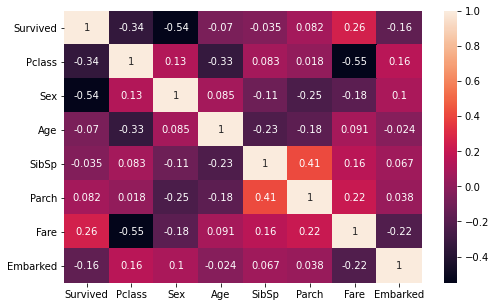

In [16]:
# Now that all the Null Values are removed, let us find the correlation between the variables

correlation = df.corr()
sns.heatmap(correlation,annot = True)
plt.show()

C:\Users\super\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


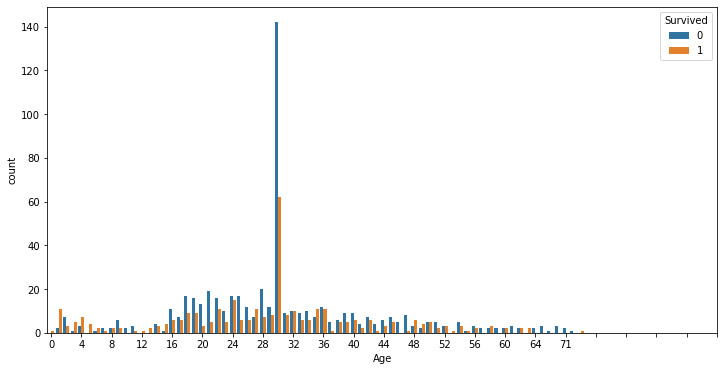

In [17]:
# We can see above that Fare has the highest correlation at 0.55
# Let us plot another graph of survival according to age

plt.figure(figsize=(12,6))
sns.countplot("Age",data = df, hue = "Survived")
plt.xticks(range(0,90,4))
plt.show()

In [18]:
# We see that between 28 to 32 has to most people


In [19]:
# Let us split the table in 2 and let the second table hold survived
X = df.drop(columns = "Survived",axis =1)
Y = df["Survived"]

In [20]:
# let us now create a Condition
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [21]:
# We will now create a linear regression model to view the prediction
model = LinearRegression()

In [22]:
# This is the training Module that we have in the linear agression model

model.fit(xtrain,ytrain) 
xtrain_predict = model.predict(xtrain)
xtrain_predict = np.round(xtrain_predict).astype(int)

train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_predict.tail()

,Predicted Value,Actual Value
835,1,1
192,1,1
629,0,0
559,1,1
684,0,0


In [23]:
# Let us now check the accuracy of our Linear Regression Model by comparing it to our Survived table
train_accuracy = accuracy_score(xtrain_predict,ytrain)
print(train_accuracy)

0.8033707865168539


In [24]:
# now Let us use our test data to create a prediction using the Linear Regression Model

xtest_predict = model.predict(xtest)
xtest_predict = np.round(xtest_predict).astype(int)

test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_predict.head()

,Predicted Value,Actual Value
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


In [25]:
# Let us see the accuracy of the test model data
test_accuracy = accuracy_score(xtest_predict,ytest)
print(test_accuracy)


0.7877094972067039
